# Heart Disease Predictor

- This *new_data* branch is for improving this model.
- I need to know more about this dataset and make my Data Science practices more clear, easy to understand, and more robust.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

#### Life cycle of a Data Science project:
- Data Collection
- EDA
- Data Preprocessing
- Feature Engineering
- Model building and evaluation
- Model deployment

## Data Collection

In [2]:
data = pd.read_csv('./data/framingham.csv')

In [3]:
data.shape

(4238, 16)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


## EDA

In [5]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


- Check for duplicated data.

In [6]:
data_duplicates = data.duplicated()
data_duplicates.sum()

0

- there are **NO** duplicates in the dataset.

- Check if we have imbalanced dataset

In [7]:
data['TenYearCHD'].value_counts()

0    3594
1     644
Name: TenYearCHD, dtype: int64

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

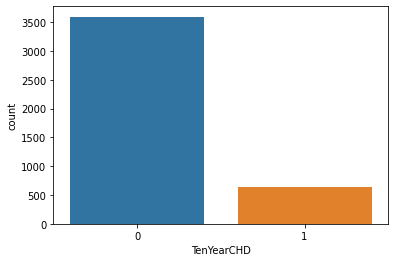

In [8]:
sns.countplot(x=data['TenYearCHD'])

- So, the above dataset is imbalanced. If we train the binary classification without fixing this issue, our model will be completely biased.
- this would also impact our feature correlation.
- So, let's handel this.

##### Handling imbalanced dataset

In [193]:
# import required packages
from sklearn.utils import resample
data_minority = data[data['TenYearCHD']==1]
data_majority = data[data['TenYearCHD']==0]
data_minority_upsampled = resample(data_minority, 
                                    replace=True, # sample with replacement
                                    n_samples=3594, # to match majority class
                                    random_state=0 # for reproducibile results
                                    )
# new upsampled/balanced data
data_balanced = pd.concat([data_minority_upsampled, data_majority])
print(data_balanced['TenYearCHD'].value_counts())

1    3594
0    3594
Name: TenYearCHD, dtype: int64


- Now let's check the shape and balance of the dataset:

In [202]:
data_balanced.shape

(7188, 16)

## Split

In [207]:
X_train, X_test, y_train, y_test = train_test_split(data_balanced.drop('TenYearCHD', axis=1), data_balanced['TenYearCHD'], test_size=0.3, random_state=0)

- shape of the dataset

In [208]:
X_train.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
471,1,61,1.0,0,0.0,1.0,0,1,1,270.0,177.5,95.0,28.15,62.0,123.0
50,0,63,1.0,1,3.0,0.0,0,1,0,267.0,156.5,92.5,27.10,60.0,79.0
4078,1,42,1.0,0,0.0,0.0,0,0,0,214.0,120.0,81.0,28.47,78.0,77.0
3912,1,43,4.0,1,20.0,0.0,0,0,0,184.0,127.5,81.0,28.31,108.0,75.0
3847,0,41,1.0,1,NaN,0.0,0,0,0,171.0,135.0,82.5,24.35,79.0,82.0


- visualize balance using sns

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

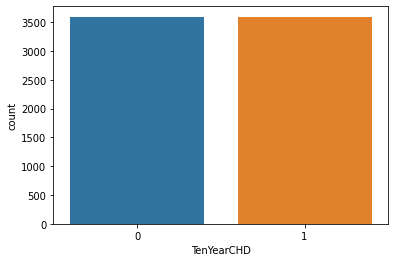

In [209]:
sns.countplot(x=data_balanced['TenYearCHD'])

- explore train and test data:

In [210]:
print('X_train.shape=', X_train.shape, '\nX_test.shape=', X_test.shape)

X_train.shape= (5031, 15) 
X_test.shape= (2157, 15)


Overview of the following procedure:
1. perform **imputation** on both train & test data seperately.
2. perform **EDA**, **preprocessing**, and **feature engineering** on the train data.
3. perform **preprocessing** on the test data as well, so that it can be a valid information for the model.
4. build model using train data.
5. test it's accuracy using test data: this will be the final accuracy of the model.

In [211]:
X_train.isnull().sum()

male                 0
age                  0
education          132
currentSmoker        0
cigsPerDay          25
BPMeds              89
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             70
sysBP                0
diaBP                0
BMI                 34
heartRate            1
glucose            441
dtype: int64

In [212]:
X_test.isnull().sum()

male                 0
age                  0
education           53
currentSmoker        0
cigsPerDay          12
BPMeds              32
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             29
sysBP                0
diaBP                0
BMI                 18
heartRate            3
glucose            190
dtype: int64

- There are some features having null values so, we need to perform imputation in the train dataset.
- why inputation? why not delete the feature itself?
    - because none of the feature contains more than half null values, infact the maximum null values contained is in *glucose* feature which is 441/5031 = 0.087 or *8.7%* approx on train data and 190/2157 = 0.088 or *8.8%* approx on test data.

- visualize the *null values*

<AxesSubplot:>

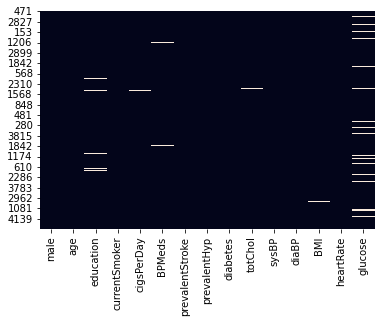

In [213]:
sns.heatmap(X_train.isnull(), cbar=False)

<AxesSubplot:>

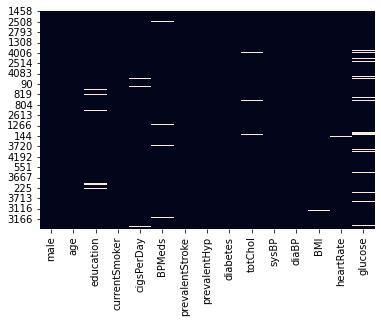

In [214]:
sns.heatmap(X_test.isnull(), cbar=False)

- all unique values of education

In [215]:
X_train['education'].unique()

array([ 1.,  4.,  3.,  2., nan])

- what impact would **education** have on Ten-year-coronary-heart-disease?
- **NO** impact right?
- So, it's just right to drop this feature itself.
- let's drop it.

In [216]:
X_train.drop('education', axis=1, inplace=True)
X_test.drop('education', axis=1, inplace=True)
X_train.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
471,1,61,0,0.0,1.0,0,1,1,270.0,177.5,95.0,28.15,62.0,123.0
50,0,63,1,3.0,0.0,0,1,0,267.0,156.5,92.5,27.10,60.0,79.0
4078,1,42,0,0.0,0.0,0,0,0,214.0,120.0,81.0,28.47,78.0,77.0
3912,1,43,1,20.0,0.0,0,0,0,184.0,127.5,81.0,28.31,108.0,75.0
3847,0,41,1,NaN,0.0,0,0,0,171.0,135.0,82.5,24.35,79.0,82.0


- in order to perform successfull imputation, without much affecting the dataset, we'll have to categorize those features having null values as **categorical/nominal** or **continuous**.
- referring from the description given for the dataset it's visible that:
    - cigsPerDay, totChol, BMI, heartRate, glucose are **continuous** features.
    - BPMeds is a **nominal** feature.
- Handlling missing values:
    1. for nominal feature: replace with the most frequent value.
    2. for continuous features: perform mean/median imputation.

Distribution of **BPMeds** in the train dataset:

<AxesSubplot:xlabel='BPMeds', ylabel='Count'>

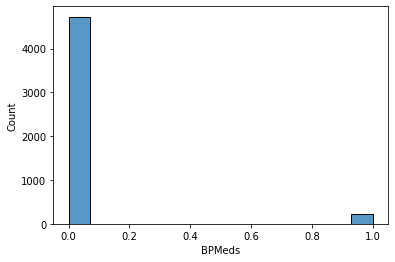

In [217]:
sns.histplot(X_train.BPMeds)

- count unique vals before imputation

In [218]:
print('X_train: \n', X_train['BPMeds'].value_counts(), 'X_test: \n', X_test['BPMeds'].value_counts())

X_train: 
 0.0    4728
1.0     214
Name: BPMeds, dtype: int64 X_test: 
 0.0    2024
1.0     101
Name: BPMeds, dtype: int64


- most frequent value is **0**
- let's impute it's mode.

In [219]:
X_train['BPMeds'].fillna(X_train.iloc[4].mode().item(), inplace=True)
X_test['BPMeds'].fillna(X_test.iloc[4].mode().item(), inplace=True)
print('X_train:', X_train['BPMeds'].isnull().sum(), '\nX_test:', X_test['BPMeds'].isnull().sum())

X_train: 0 
X_test: 0


In [220]:
print('X_train: \n', X_train['BPMeds'].value_counts(), 'X_test: \n', X_test['BPMeds'].value_counts())

X_train: 
 0.0    4817
1.0     214
Name: BPMeds, dtype: int64 X_test: 
 0.0    2056
1.0     101
Name: BPMeds, dtype: int64


- So, the missing values of BPMeds are handlled.
- *Nominal value imputation is complete!*
- Now imputing continuous values!

In [221]:
X_train.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          25
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             70
sysBP                0
diaBP                0
BMI                 34
heartRate            1
glucose            441
dtype: int64

In [222]:
X_test.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          12
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             29
sysBP                0
diaBP                0
BMI                 18
heartRate            3
glucose            190
dtype: int64

- filling missing values in **continuous** variables.

In [223]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputed_X_train = pd.DataFrame(imputer.fit_transform(X_train))
imputed_X_test = pd.DataFrame(imputer.transform(X_test))

# imputation removed column names: putting them back
imputed_X_train.columns = X_train.columns
imputed_X_test.columns = X_test.columns

<AxesSubplot:>

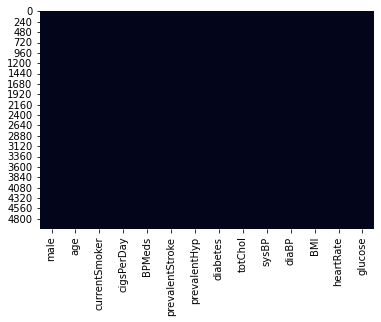

In [224]:
sns.heatmap(imputed_X_train.isnull(), cbar=False)

<AxesSubplot:>

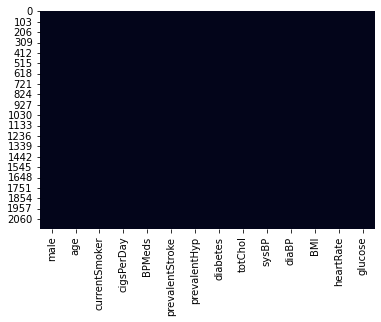

In [225]:
sns.heatmap(imputed_X_test.isnull(), cbar=False)

- Now assign imputed_X_train and imputed_X_test to X_train and X_test respectively.

In [226]:
X_train = imputed_X_train
X_test = imputed_X_test

print('X_train.isnull().sum().sum(): ', X_train.isnull().sum().sum(),
'\nX_test.isnull().sum().sum(): ',X_test.isnull().sum().sum())

X_train.isnull().sum().sum():  0 
X_test.isnull().sum().sum():  0


- Now missing/null values are completely handlled in both X_train and X_test.
- From now on I'll only focus on X_train data for any analysis, and buil the model on it.

#### Analysing the relationships between different features

In [365]:
X_train.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.0,61.0,0.0,0.000000,1.0,0.0,1.0,1.0,270.0,177.5,95.0,28.15,62.0,123.0
1,0.0,63.0,1.0,3.000000,0.0,0.0,1.0,0.0,267.0,156.5,92.5,27.10,60.0,79.0
2,1.0,42.0,0.0,0.000000,0.0,0.0,0.0,0.0,214.0,120.0,81.0,28.47,78.0,77.0
3,1.0,43.0,1.0,20.000000,0.0,0.0,0.0,0.0,184.0,127.5,81.0,28.31,108.0,75.0
4,0.0,41.0,1.0,9.722333,0.0,0.0,0.0,0.0,171.0,135.0,82.5,24.35,79.0,82.0


In [251]:
new_index = list(X_train.index)

In [274]:
y_train.index.duplicated().sum()

0

In [270]:
y_train = pd.DataFrame(y_train.reset_index())['TenYearCHD']

In [272]:
y_train.shape

(5031,)

<AxesSubplot:xlabel='male', ylabel='Count'>

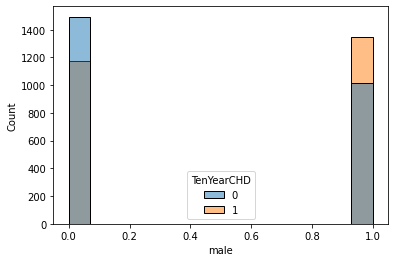

In [273]:
sns.histplot(x=X_train['male'], hue=y_train)

- more ratio of males have TenYearCHD than females

- Distribution of *age* in the entire dataset.

<AxesSubplot:xlabel='age', ylabel='Count'>

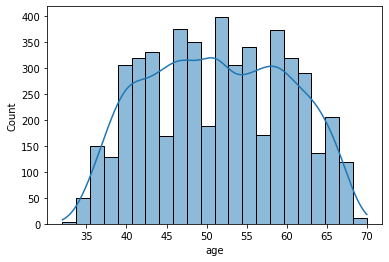

In [275]:
sns.histplot(x=X_train['age'], kde=True)

- There is a uniform distribution in the age feature throughout the dataset.

- Can there be a relation between the fraction of people having 10yearCHD at an age and the age?
- yes, let's see if this relation increases with age or something else.

In [276]:
# count of heart disease based on age
ages = list(X_train['age'].unique())
y = []
for age in ages:
    count = 0
    count_total = len(X_train[X_train['age']==age])
    for i in range(0, len(X_train)):
        if X_train['age'][i] == age:
            count += list(y_train)[i]
    y.append(count/count_total)

In [280]:
X_train['age'].value_counts()

51.0    208
59.0    196
48.0    194
46.0    192
52.0    190
50.0    188
47.0    182
58.0    177
44.0    174
57.0    171
40.0    171
55.0    170
56.0    170
45.0    168
41.0    164
60.0    160
61.0    158
54.0    157
49.0    156
43.0    156
42.0    155
53.0    148
62.0    146
63.0    144
64.0    136
39.0    134
38.0    129
65.0    118
67.0     91
66.0     87
37.0     79
36.0     71
35.0     36
68.0     27
34.0     13
69.0     10
70.0      2
33.0      2
32.0      1
Name: age, dtype: int64

[Text(0.5, 0, 'age'), Text(0, 0.5, 'fraction of CHD patients at an age')]

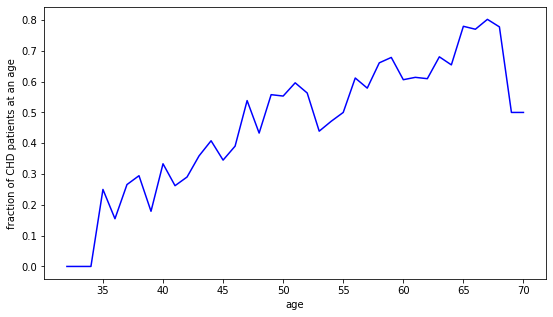

In [281]:
age_plot = plt.figure(figsize=(9,5))
age_plot = sns.lineplot(x=ages, y=y, color='b')
age_plot.set(xlabel='age', ylabel='fraction of CHD patients at an age')

From the above plot it's clear that with age more fraction of people suffer
from the 10yearCHD.
Also, we can say that the more is your age, there is a higher chance of you having 10yearCHD. And, we can also see a sudden downfall in the graph at an age of 68 approx which can be justified by the fact that the number of people present in the dataset with that age is also less, hence the fraction is less, say for example age=70 has only 2 people out of which 1 has TenYearCHD so fraction is 0.5, OR 50% chance of having TenYearCHD.

<AxesSubplot:xlabel='currentSmoker', ylabel='Count'>

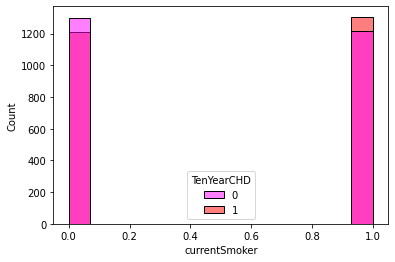

In [282]:
sns.histplot(x=X_train['currentSmoker'], hue=y_train, palette=['Magenta','r'])

- So, whether or not the person smokes or not they have almost equal chance of having the TenYearCHD.
- So, maybe this feature does not effect our overall prediction of the heart disease.
- Also it might be help full to know that although smoking doesn't matter a/c to the dataset, but the number of ciggerates smoked per day will matter as smoking is one of the direct cause of Coronary Heart disease.

<AxesSubplot:xlabel='cigsPerDay', ylabel='age'>

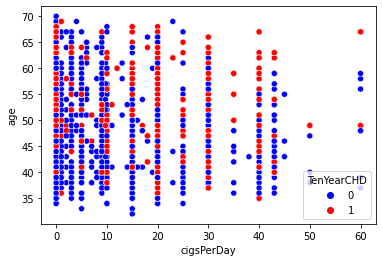

In [283]:
sns.scatterplot(x=X_train['cigsPerDay'], y=X_train['age'], hue=y_train, palette=['b','r'])

#### From the above plot
- for age between 0 to 15 and 30 to 60 there is a medium fraction of people having the disease.
- for age above 15 till 30 there is a large fraction of people having the disease.
- The above two statements can be obvious because the number of aged people are less in the dataset.

Let's also see the distribution of *cigsPerDay* feature in the train dataset.

<AxesSubplot:xlabel='cigsPerDay', ylabel='Count'>

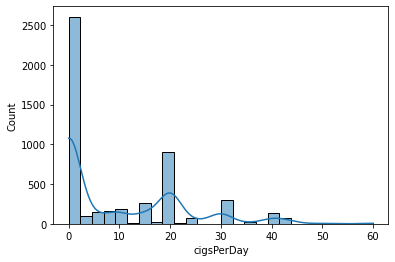

In [309]:
sns.histplot(x=X_train['cigsPerDay'], kde=True)

- So, this plot explains why we see such variations in the scatter plot above, because the distribution itself is not normal.
- Let's convert it into normal distribution, to analyse the data well.

<AxesSubplot:xlabel='cigsPerDay', ylabel='Count'>

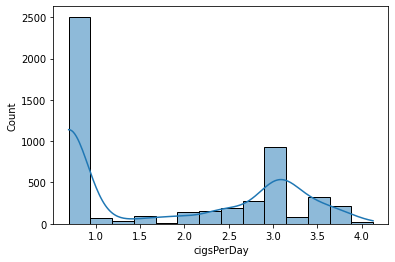

In [340]:
sns.histplot(x=np.log(X_train['cigsPerDay']+2), kde=True)

<AxesSubplot:xlabel='cigsPerDay', ylabel='age'>

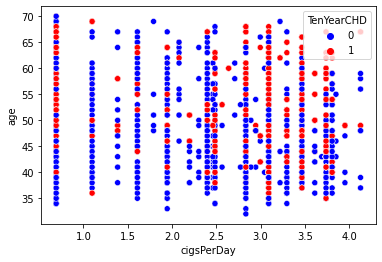

In [341]:
sns.scatterplot(x=np.log(X_train['cigsPerDay']+2), y=X_train['age'], hue=y_train, palette=['b','r'])

- Now we see that if the distribution becomes more inclined towards normal(bell shaped), the more ciggrate smoked per day leads to a high chance of TenYearCHD irrespective of the age of that person. Which is obvious!
- This **strongly** indicates that *cigsPerDay* is vital feature for predicting the TenYearCHD.

- High blood pressure can cause many heart problems, including: Coronary heart disease.
- Let's examine how bpMeds effects the disease.

<AxesSubplot:xlabel='BPMeds', ylabel='Count'>

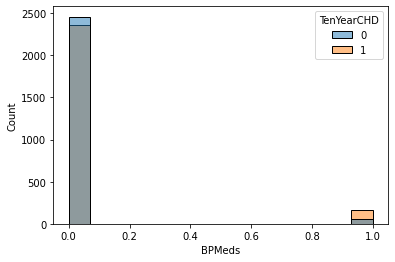

In [342]:
sns.histplot(x=X_train['BPMeds'], hue=y_train)

- As obvious from the above plot we see that a person having BP medications has a high chance of having TenYearCHD.
- But what is the age variation of the people taking BP medications?
    - let's examine it.

In [343]:
len(X_train[X_train['BPMeds']==1])

214

So, very few people take BP medications, or simply put very few people suffer from BP problems.
But what age group suffers most BP problems?
Let's find out...

In [346]:
len(X_train[X_train['BPMeds']==1]['age'])

214

<AxesSubplot:xlabel='BPMeds', ylabel='age'>

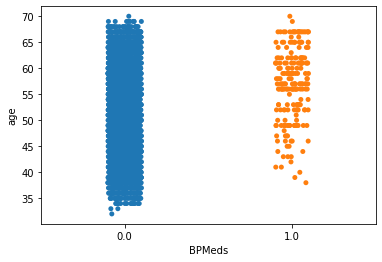

In [352]:
sns.stripplot(x='BPMeds', y='age', data=X_train)

- Most of the people who take BPMeds are aged in the range of 50s to 70s and they have a chance of probably greater than 50%(from the histplot above).

#### Conclusions from the above analysis about the BPMeds feature:
    1. More than 50% chance of having TenYearCHD if a person is in BPMeds.
    2. Most of the senior citizens are on BP medications.
##### BPMeds is a vital feature in predicting TenYearCHD.

##### Strokes and TenYearCHD

- Approximately one fourth of patients with a recent stroke have a history of symptomatic coronary artery disease.
- These patients are prone to recurrent coronary heart disease (CHD) events with a 10-year risk >20%.
- Seems that *Stroke* plays a vital role in predicting future heart related problems, let's analyse it.
###### Referenced article: https://www.ahajournals.org/doi/10.1161/strokeaha.109.564781


In [353]:
X_train.columns

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')

<AxesSubplot:xlabel='prevalentStroke', ylabel='Count'>

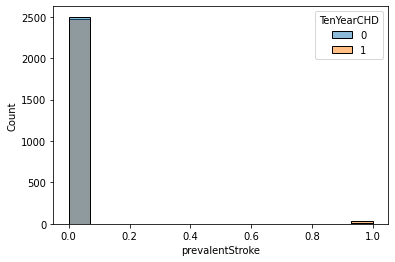

In [354]:
sns.histplot(x=X_train['prevalentStroke'], hue=y_train)

- Again! Almost every person suffered from a stroke had a chance of more than 95%(approx) for TenYearCHD(the article was indicating towards this, and further justified by the dataset).
- Now let's examine the age variation of *prevalentStroke*.

<AxesSubplot:xlabel='prevalentStroke', ylabel='age'>

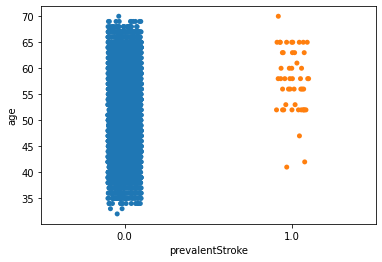

In [357]:
sns.stripplot(x='prevalentStroke', y='age', data=X_train)

- Again almost only senior citizen suffer from strokes

#### Conclusions from the above analysis about the prevalentStroke feature:
    1. More than 95% chance of having TenYearCHD if a person has suffered a stroke before.
    2. Most of the senior citizens have suffere a stroke.
##### prevalentStroke is a vital feature in predicting TenYearCHD.

##### Hypertensive

High blood pressure, also called hypertension, is blood pressure that is higher than normal. Your blood pressure changes throughout the day based on your activities. Having blood pressure measures consistently above normal may result in a diagnosis of high blood pressure (or hypertension).

<AxesSubplot:xlabel='prevalentHyp', ylabel='Count'>

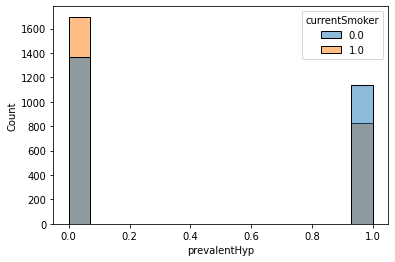

In [358]:
sns.histplot(x=X_train['prevalentHyp'], hue=X_train['currentSmoker'])

- A person having had a hypertension has a higher chance of being a current smoker than a non smoker.
#### But why now are they not having hypertension even when they are smoking?
    Well, we can say that they have cured their hypertension recently by being on BPMeds and now they neither have hypertension nor are on BPMeds.
- Also it's been found that smoking is one of the cause for hypertension which is also clearly depicted by the above plot.
- If the person was hypertensive earlier, then he/she must not be on BPMeds because now they are not hypertensive, they were in the past. Let's see.

<AxesSubplot:xlabel='prevalentHyp', ylabel='Count'>

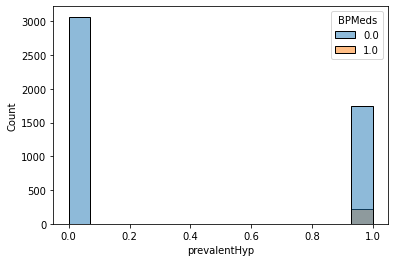

In [360]:
sns.histplot(x=X_train['prevalentHyp'], hue=X_train['BPMeds'])

- All of them who were hypertensive are not on BPMeds, because they were priviously on BPMeds, but when they cured from hypertensiveness they also quit taking BP medications.
- Let's see what is the chance of such a person having a TenYearCHD.

<AxesSubplot:xlabel='prevalentHyp', ylabel='Count'>

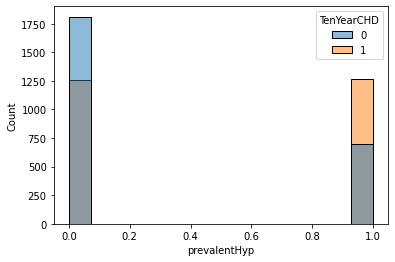

In [361]:
sns.histplot(x=X_train['prevalentHyp'], hue=y_train)

- They clearly have a high chance of having the disease.
##### How does age vary with this hypertensiveness?

<AxesSubplot:xlabel='prevalentHyp', ylabel='age'>

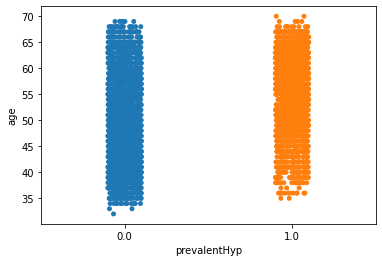

In [364]:
sns.stripplot(x='prevalentHyp', y='age', data=X_train)

- Almost every person suffers from hypertension irrespective of their age.